## To predict diabetes using PIMA dataset


### Importing required libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


 Volume Serial Number is 3464-854D

 Directory of D:\PGDM_Xaviers_2021\Fourth_Week_Classification

31-01-2021  09:02    <DIR>          .
31-01-2021  09:02    <DIR>          ..
31-01-2021  07:34    <DIR>          .ipynb_checkpoints
31-01-2021  09:02           162,180 diabetes_classification_problem.ipynb
31-01-2021  03:17            11,691 diabetes-classification.zip
02-12-2019  05:22             1,071 sample_submission.csv
02-12-2019  05:22             5,202 test.csv
02-12-2019  05:22            21,482 train.csv
               5 File(s)        201,626 bytes
               3 Dir(s)  298,222,190,592 bytes free


In [132]:
%ls

 Volume in drive D is New Volume

In [73]:
# Loading both the datasets
data = pd.read_csv("train.csv")
#test= pd.read_csv("test.csv")

In [74]:
# Checking the shape
data.shape

(614, 10)

In [75]:
# Checking first few rows of training dataset
data.head(2)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1


In [134]:
# Checking first few rows of test dataset
#test.head(2)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [76]:
## Checking the null values in the data set
data.isnull().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [77]:
## Another way of checking if the values are null; it gives result in bool yes or no
data.isnull().values.any()

False

In [78]:
## Checking column names in training dataset
data.columns

Index(['p_id', 'no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age', 'diabetes'],
      dtype='object')

In [79]:
## Checking the data types
data.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

## Understanding the feature names, their units asper requirement
Pima Indians Diabetes Database

Number of Instances: 768

Number of Attributes: 8 plus class

Columns Description:

Number of times pregnant  

Plasma glucose concentration a 2 hours in an oral glucose tolerance test  

Diastolic blood pressure (mm Hg)  

Triceps skin fold thickness (mm)  

2-Hour serum insulin (mu U/ml)  

Body mass index (weight in kg/(height in m)^2)  

Diabetes pedigree function  

Age (years)   

Class variable (0 or 1)  

Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")


In [80]:
## Lets check the number of zeroes and ones or lets get a distribution of how many has diabetes and how many do not
data["diabetes"].value_counts()

0    400
1    214
Name: diabetes, dtype: int64

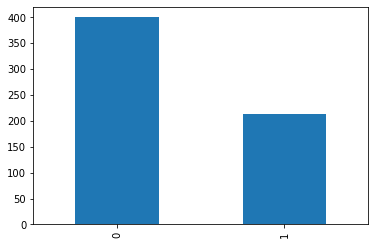

In [81]:
## Plotting bar plot

data["diabetes"].value_counts().plot(kind = "bar")  ## alpha=0.5  ## Setting alpha as per transparency
plt.show()

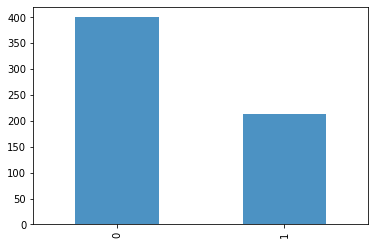

In [136]:
data["diabetes"].value_counts().plot(kind = "bar", alpha = 0.8)
plt.show()

In [140]:
#check = pd.read_csv("test.csv")
#check["diabetes"].value_counts().plot(kind = "bar") 
#pd.read_csv("test.csv")

## Question!!
test["diabetes"].value_counts().plot(kind = "bar")  

Key Error?? Find out??

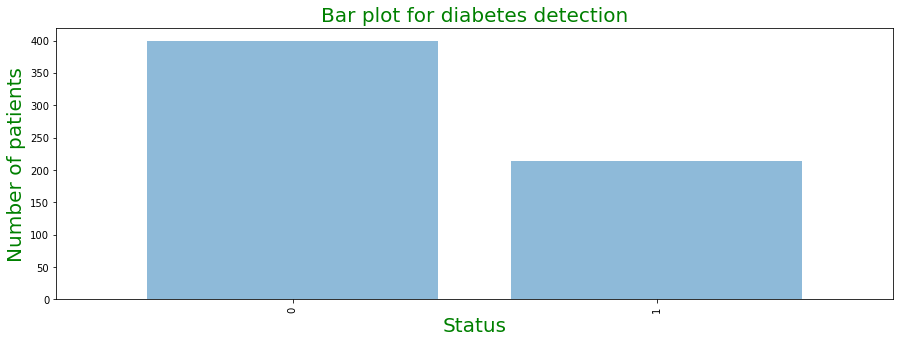

In [149]:
## Plotting a bar plot with matplot lib for diabetes column

plt.figure(figsize=(15,5)) 

data["diabetes"].value_counts().plot(kind = "bar", alpha=0.5, width=0.8)

#plt.figure(figsize=(15,5)) 

plt.title("Bar plot for diabetes detection", fontdict={'fontsize':20,'fontweight':8,'color':'Green'})

plt.xlabel("Status", fontdict={'fontsize':20,'fontweight':22,'color':'Green'})

plt.ylabel("Number of patients", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})

plt.show()

## Introducing seaborn

In [84]:
import seaborn as sns

## Correlation matrix 

In [86]:
corr_mat = data.corr()

In [87]:
data.corr()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
p_id,1.000000,-0.034607,-0.001407,0.027835,0.008890,0.011636,-0.003948,-0.052759,0.020156,-0.071237
no_times_pregnant,-0.034607,1.000000,0.123416,0.140526,-0.085653,-0.091123,-0.004101,-0.005811,0.534231,0.209196
glucose_concentration,-0.001407,0.123416,1.000000,0.160167,0.043053,0.330860,0.222449,0.131274,0.241590,0.469336
blood_pressure,0.027835,0.140526,0.160167,1.000000,0.214275,0.088827,0.296000,0.042320,0.236387,0.072003
skin_fold_thickness,0.008890,-0.085653,0.043053,0.214275,1.000000,0.439886,0.413288,0.187470,-0.144741,0.052695
serum_insulin,0.011636,-0.091123,0.330860,0.088827,0.439886,1.000000,0.200914,0.176183,-0.052863,0.116562
bmi,-0.003948,-0.004101,0.222449,0.296000,0.413288,0.200914,1.000000,0.116301,0.025209,0.275263
diabetes pedigree,-0.052759,-0.005811,0.131274,0.042320,0.187470,0.176183,0.116301,1.000000,0.053637,0.173301
age,0.020156,0.534231,0.241590,0.236387,-0.144741,-0.052863,0.025209,0.053637,1.000000,0.221736
diabetes,-0.071237,0.209196,0.469336,0.072003,0.052695,0.116562,0.275263,0.173301,0.221736,1.000000


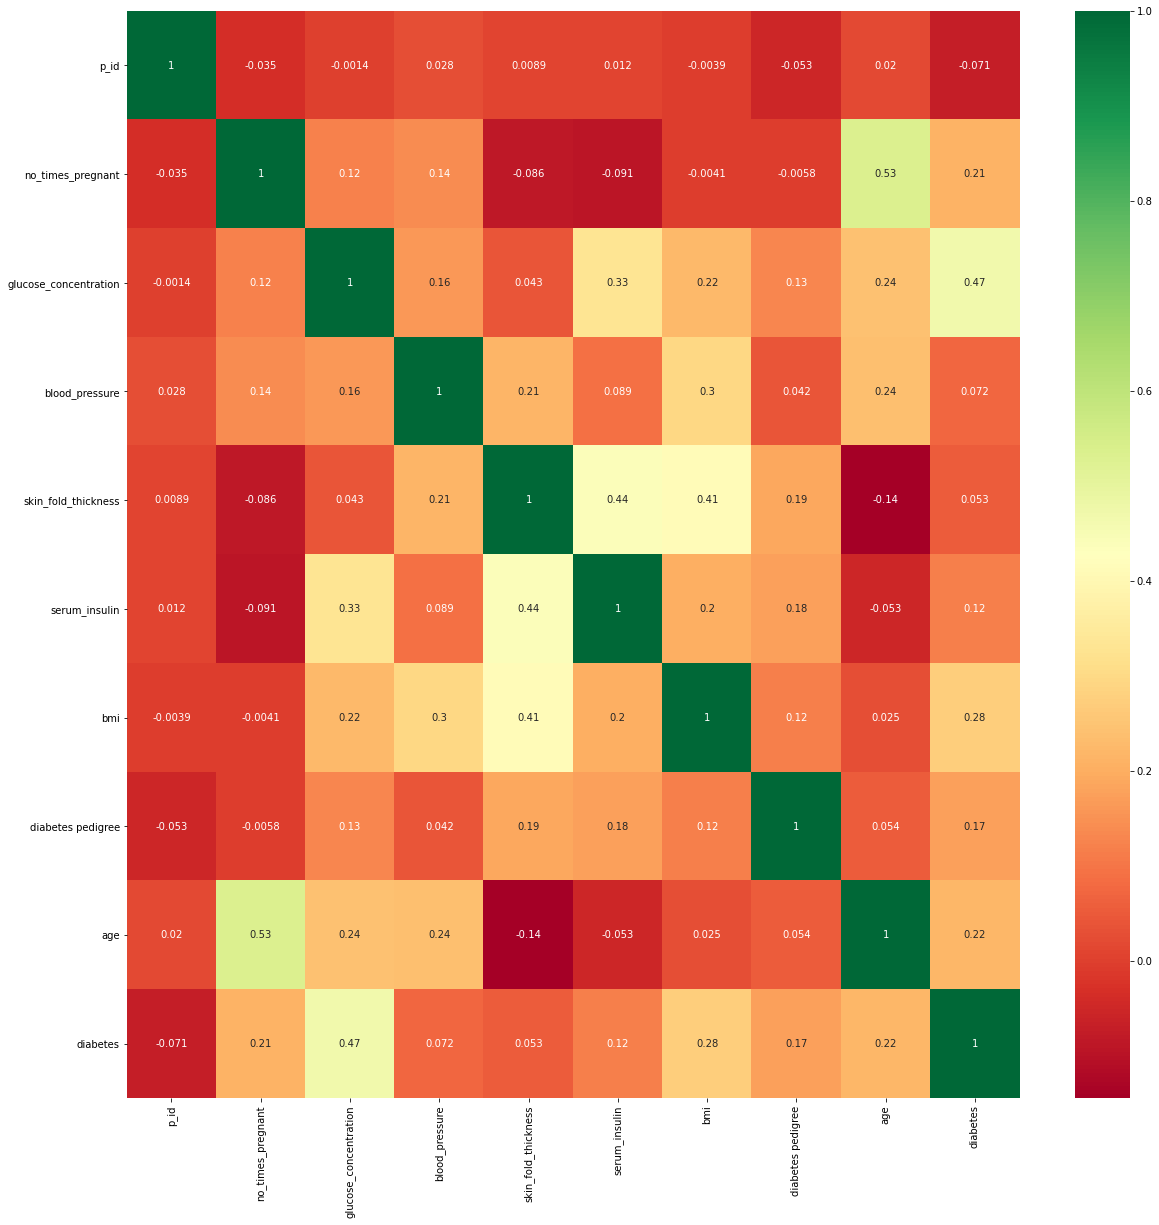

In [88]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show()


## Changing the diabetes column data from boolean to number¶

In case your diabetes column has values True for 1's and False for 0's. How to replace both at the same time?

In [151]:
diabetes_map = {True: 1, False: 0}  ## Creating a map; its nothing but a dictionary

In [150]:
data['diabetes'] = data['diabetes'].map(diabetes_map)


In [152]:
data.head(3)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1


### Train Test Split with sci-kit learn

In [153]:
data.shape

(614, 10)

In [154]:
from sklearn.model_selection import train_test_split

feature_columns = ['p_id', 'no_times_pregnant', 'glucose_concentration', 'blood_pressure','skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree','age']
target = ['diabetes']

In [155]:
data.columns

Index(['p_id', 'no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age', 'diabetes'],
      dtype='object')

In [156]:
X = data[feature_columns].values ## Independent features/variables
y = data[target].values

In [157]:
X

array([[3.16e+02, 2.00e+00, 1.12e+02, ..., 3.41e+01, 3.15e-01, 2.60e+01],
       [2.50e+01, 1.10e+01, 1.43e+02, ..., 3.66e+01, 2.54e-01, 5.10e+01],
       [7.10e+02, 2.00e+00, 9.30e+01, ..., 3.80e+01, 6.74e-01, 2.30e+01],
       ...,
       [7.30e+02, 2.00e+00, 9.20e+01, ..., 3.01e+01, 1.41e-01, 2.20e+01],
       [1.03e+02, 0.00e+00, 1.25e+02, ..., 2.25e+01, 2.62e-01, 2.10e+01],
       [6.03e+02, 1.00e+00, 1.24e+02, ..., 2.78e+01, 1.00e-01, 3.00e+01]])

In [159]:
#y

training             y train  
-------------------  1
--------------------  0
--------------------   1
--------------------  0
test                   y test
---------------------  1


In [160]:
## Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [161]:
print("Train data shape :" , X_train.shape)
print("Test data shape :" , X_test.shape)

Train data shape : (491, 9)
Test data shape : (123, 9)


In [162]:
print("Target in train shape :" , y_train.shape)
print("Target in test shape :" , y_test.shape)

Target in train shape : (491, 1)
Target in test shape : (123, 1)


In [108]:
## Now what to do if the feature values are 0 at some places?
## Lets check out!

data.head(15)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
5,152,4,114,65,0,0,21.9,0.432,37,0
6,173,2,87,0,23,0,28.9,0.773,25,0
7,276,2,100,70,52,57,40.5,0.677,25,0
8,624,0,94,70,27,115,43.5,0.347,21,0
9,443,4,117,64,27,120,33.2,0.230,24,0


In [112]:
print("total number of rows : {0}".format(len(data)))

print("number of rows missing in pregnancy: {0}".format(len(data.loc[data['no_times_pregnant'] == 0])))
print("number of rows missing in glucose_conc: {0}".format(len(data.loc[data['glucose_concentration'] == 0])))
print("number of rows missing in bp: {0}".format(len(data.loc[data['blood_pressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['serum_insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pedigree: {0}".format(len(data.loc[data['diabetes pedigree'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))


print("number of rows missing skin: {0}".format(len(data.loc[data['skin_fold_thickness'] == 0])))

total number of rows : 614
number of rows missing in pregnancy: 90
number of rows missing in glucose_conc: 4
number of rows missing in bp: 31
number of rows missing insulin: 304
number of rows missing bmi: 10
number of rows missing diab_pedigree: 0
number of rows missing age: 0
number of rows missing skin: 187


In [166]:
len(data.loc[data["no_times_pregnant"] == 0])

90

In [115]:
print("total number of rows : ", len(data))


total number of rows :  614


In [167]:
print("number of rows missing in pregnancy: ", len(data.loc[data['no_times_pregnant'] == 0]))


number of rows missing in pregnancy:  90


## Looks like lot of 0s are there, what to do now??

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [168]:
## sklearn has a functionality to perform imputation in one shot
##Imputation transformer for completing missing values.

from sklearn.impute import SimpleImputer

In [169]:
imputer = SimpleImputer(missing_values=0, strategy='mean')

In [123]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)


In [122]:
Before

array([[7.50e+01, 1.00e+00, 7.90e+01, ..., 3.20e+01, 3.96e-01, 2.20e+01],
       [5.83e+02, 1.20e+01, 1.21e+02, ..., 2.65e+01, 2.59e-01, 6.20e+01],
       [3.44e+02, 5.00e+00, 1.22e+02, ..., 3.47e+01, 2.90e-01, 3.30e+01],
       ...,
       [5.03e+02, 6.00e+00, 0.00e+00, ..., 3.90e+01, 7.27e-01, 4.10e+01],
       [3.12e+02, 0.00e+00, 1.06e+02, ..., 3.94e+01, 6.05e-01, 2.20e+01],
       [3.55e+02, 3.00e+00, 9.00e+01, ..., 4.27e+01, 5.59e-01, 2.10e+01]])

In [124]:
X_train (After)

array([[7.50000000e+01, 1.00000000e+00, 7.90000000e+01, ...,
        3.20000000e+01, 3.96000000e-01, 2.20000000e+01],
       [5.83000000e+02, 1.20000000e+01, 1.21000000e+02, ...,
        2.65000000e+01, 2.59000000e-01, 6.20000000e+01],
       [3.44000000e+02, 5.00000000e+00, 1.22000000e+02, ...,
        3.47000000e+01, 2.90000000e-01, 3.30000000e+01],
       ...,
       [5.03000000e+02, 6.00000000e+00, 1.21224824e+02, ...,
        3.90000000e+01, 7.27000000e-01, 4.10000000e+01],
       [3.12000000e+02, 4.65135135e+00, 1.06000000e+02, ...,
        3.94000000e+01, 6.05000000e-01, 2.20000000e+01],
       [3.55000000e+02, 3.00000000e+00, 9.00000000e+01, ...,
        4.27000000e+01, 5.59000000e-01, 2.10000000e+01]])

In [172]:
## Applying algorithm

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [173]:
##Predicting on your x test data

predict_train_data = random_forest_model.predict(X_test)



In [175]:
## For importing performance metrics

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.870


In [178]:
predict_train_data.shape

(123,)